In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import os

#get working directory
cwd = os.getcwd()
cwd

#run multiple commands per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option("display.max_rows", None)

In [19]:
#read in csv file into the google collab
#from google.colab import files
#uploaded = files.upload()
#vg = pd.read_csv(io.BytesIO(uploaded['vgsales.csv']))
#vg.head()

#version for juptyer notebook thru anaconda
vg = pd.read_csv('C:\\Users\\chris\\2020\\vgsales.csv')


In [20]:
# Video Games Sales from: https://www.kaggle.com/gregorut/videogamesales/data
print(vg.info())
print(vg.shape)
print(vg.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None
(16598, 11)
Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


In [21]:
#Going to clean data and convert year so there are no decimal points

#get shape of vg dataframe
vg.shape

#get the number of null values in column Year
vg.Year.isnull().sum()

#Can do this instead of dropping na values, can just keep finite values
#vg = vg[np.isfinite(vg['Year'])]

#drop null values from whole dataframe
vg = vg.dropna()

#convert year column to int so it eliminates the decimal points: was 2005.0 but now is 2005
vg['Year'] = vg["Year"].astype(int)
#confirm the change in datatype
vg.dtypes
#see new dataframe
vg.head()


(16598, 11)

271

Rank              int64
Name             object
Platform         object
Year              int32
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Text(0.5, 1.0, 'North American Sales')

Text(0, 0.5, '$ (Millions)')

Text(0.5, 0.98, '')

Text(0.5, 1.0, 'European Sales')

Text(0, 0.5, '$ (Millions)')

Text(0.5, 0.98, '')

Text(0.5, 1.0, 'Japan Sales')

Text(0, 0.5, '$ (Millions)')

Text(0.5, 0.98, '')

Text(0.5, 1.0, 'Other Sales')

Text(0, 0.5, '$ (Millions)')

Text(0.5, 0.98, '')

Text(0.5, 1.0, 'Global Sales')

Text(0, 0.5, '$ (Millions)')

Text(0.5, 0.98, '')

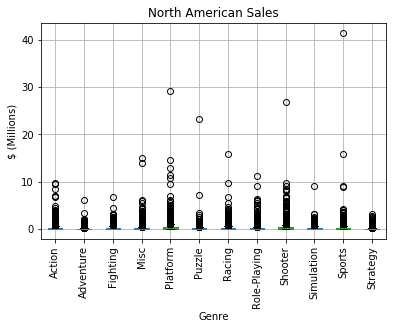

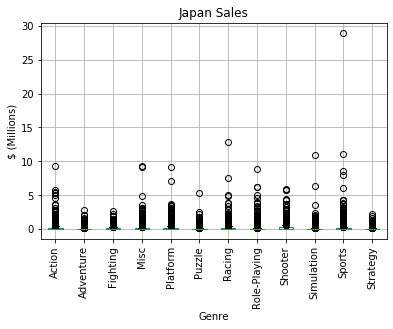

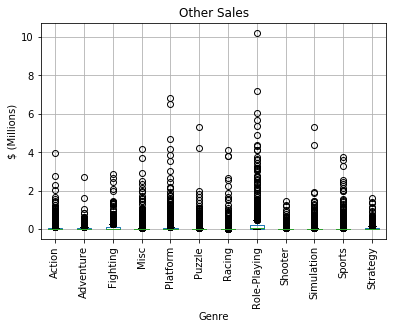

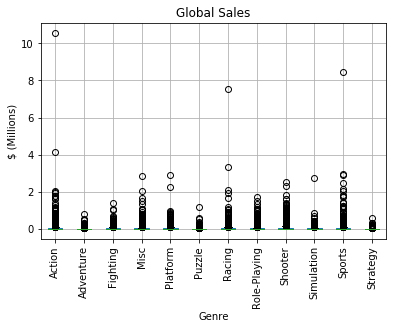

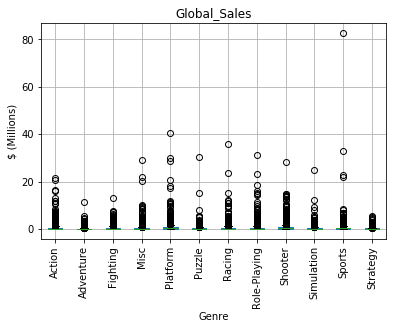

In [22]:
#Boxplot depicting range of the sales of video games by genre and by region
vg.boxplot(column='NA_Sales', by='Genre', rot=90)
# the suptitle('') lines here hide extra line that says "grouped by genre"
# I added this line because it wasn't printing the boxplots nicely 
plt.title("North American Sales")
plt.ylabel('$ (Millions)')
plt.suptitle('')

vg.boxplot(column='EU_Sales', by='Genre', rot=90)
plt.title("European Sales")
plt.ylabel('$ (Millions)')
plt.suptitle('')


plt.title("Japan Sales")
vg.boxplot(column='JP_Sales', by='Genre', rot=90)
plt.ylabel('$ (Millions)')
plt.suptitle('')

plt.title("Other Sales")
vg.boxplot(column='Other_Sales', by='Genre', rot=90)
plt.ylabel('$ (Millions)')
plt.suptitle('')

plt.title("Global Sales")
vg.boxplot(column='Global_Sales', by='Genre', rot=90)
plt.ylabel('$ (Millions)')
plt.suptitle('')


count    16291.000000
mean         0.540910
std          1.567345
min          0.010000
25%          0.060000
50%          0.170000
75%          0.480000
max         82.740000
Name: Global_Sales, dtype: float64


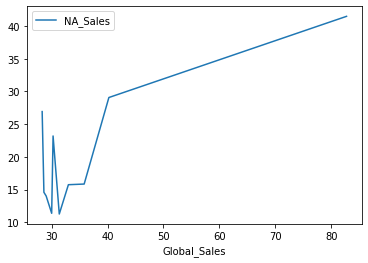

In [23]:
print(vg['Global_Sales'].describe())
vg1 = vg.iloc[0:10].plot(y='NA_Sales', x='Global_Sales')
plt.show()


In [65]:
##Seaborn tutorial https://www.kaggle.com/paragondefender/seaborn-tutorial

import seaborn as sns
sns.set(style="darkgrid")

from collections import Counter
vg.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


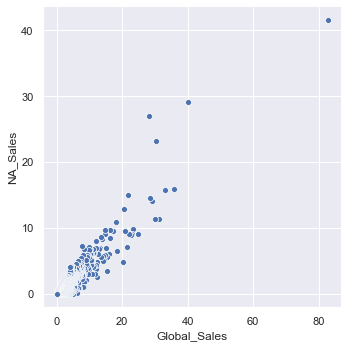

In [26]:
#Scatterplot global sales against na sales
sns.relplot(x="Global_Sales",y="NA_Sales",data=vg,height=5)

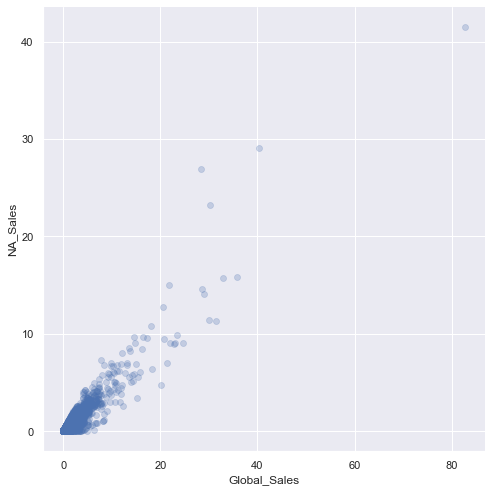

In [27]:
##Scatterplot global sales against na sales with different formatting specifications
sns.relplot(x="Global_Sales", y="NA_Sales",data=vg,height=7, alpha=0.25, edgecolor=None)

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Platform')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Most common 20 of Platform')

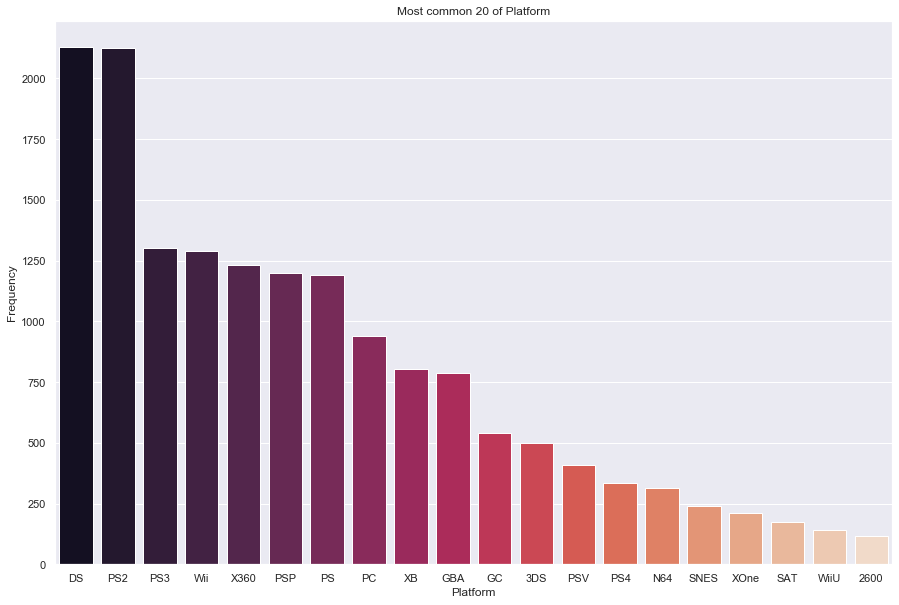

In [30]:
platform_count = Counter(vg.Platform)
most_platform=platform_count.most_common(20)
platform_name,count = zip(*most_platform)
platform_name,count = list(platform_name),list(count)

# visualization

plt.figure(figsize=(15,10))
ax=sns.barplot( x = platform_name, y = count, palette = 'rocket')
plt.xlabel('Platform')
plt.ylabel('Frequency')
plt.title('Most common 20 of Platform')
plt.show()

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

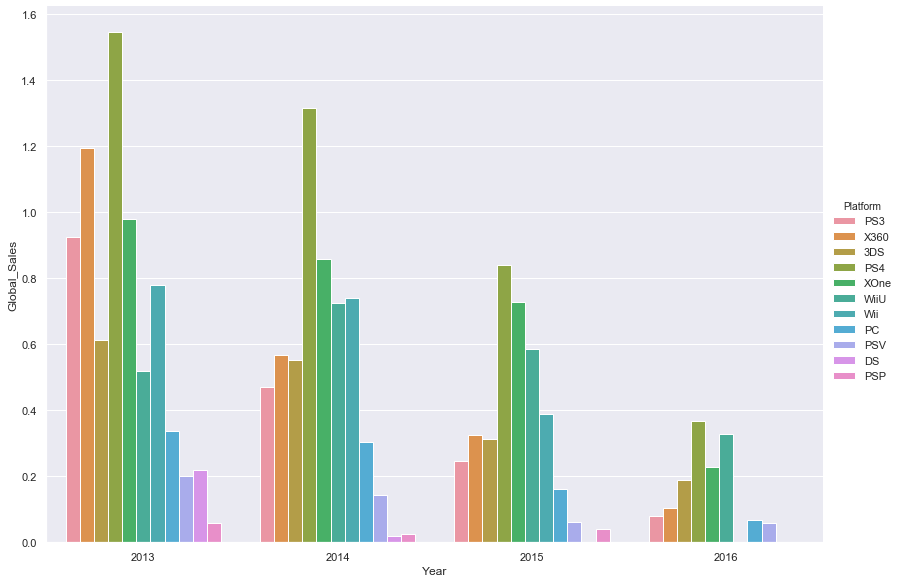

In [37]:
first_filter=vg.Year>2012
second_filter=vg.Year<2017
new_vg=vg[first_filter&second_filter]

plt.figure(figsize=(15,10))
sns.catplot(x="Year",y="Global_Sales",kind="bar",
            hue="Platform",
            data=new_vg,
            edgecolor=None,
            height=8.27, aspect=11.7/8.27,ci=None)
plt.show()

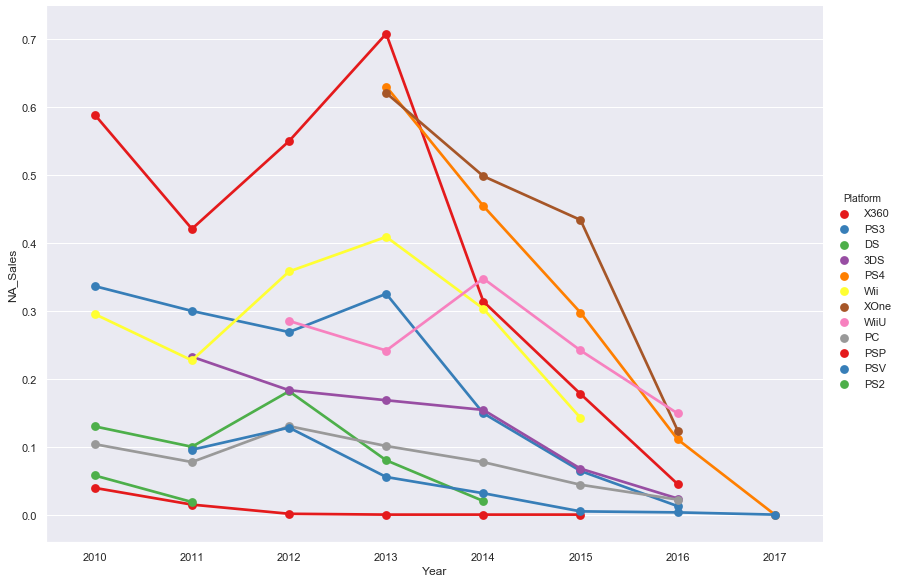

In [38]:
#2010-2017
first_filter=vg.Year>2009
second_filter=vg.Year<2018
vg1=vg[first_filter&second_filter]


#visualization

sns.catplot(x="Year",y="NA_Sales",kind="point",
            data=vg1,
            hue = "Platform",
            palette='Set1',
            ci = None,
            edgecolor=None,
            height=8.27, 
            aspect=11.7/8.27)
plt.show()

Text(0.5, 0, 'Years')

Text(0, 0.5, 'Values')

Text(5.7, 240, 'Action')

Text(5.7, 230, 'Shooter')

Text(5.7, 220, 'Sports')

Text(5.7, 210, 'Role-Playing')

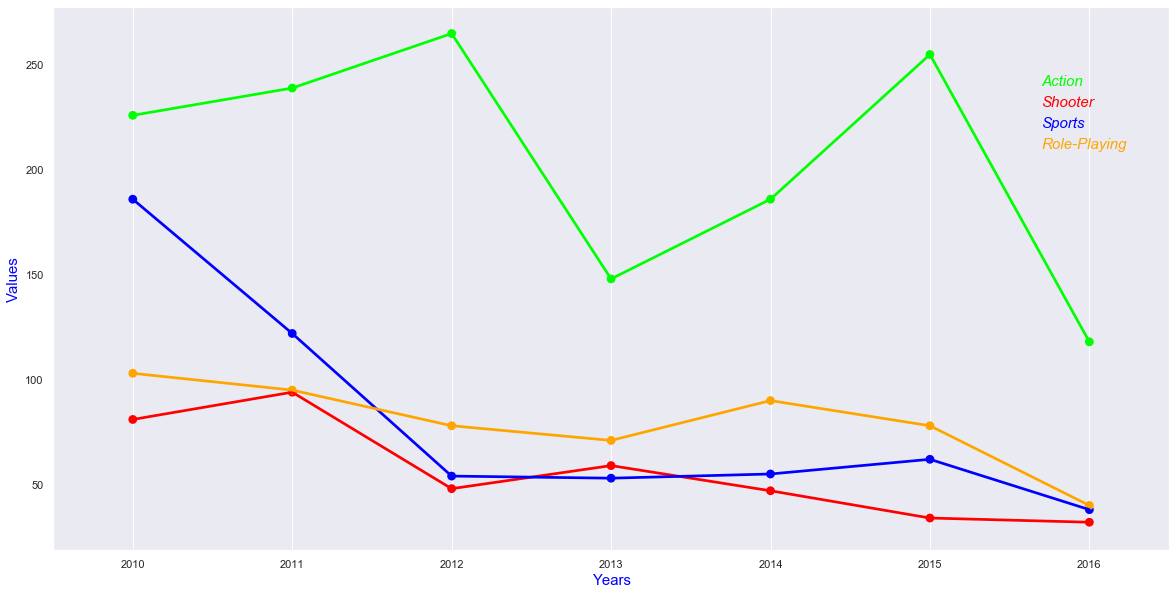

In [40]:
#creating a subset df with year, genre and global sales
data1=vg[['Year','Genre','Global_Sales']]
#set_index function sets the variable year as the index which enables easier subsetting for time series
data1=vg.set_index('Year')
#create empty list for 2010 data
data2010=[]
# append 2010 data for the 4 genres to the data2010 list
data2010.append([sum(data1.loc[2010].Genre=='Shooter'),sum(data1.loc[2010].Genre=='Sports'), sum(data1.loc[2010].Genre=='Action'),sum(data1.loc[2010].Genre=='Role-Playing')])
# append 2011 data for the 4 genres to the data2010 list
data2010.append([sum(data1.loc[2011].Genre=='Shooter'),sum(data1.loc[2011].Genre=='Sports'), sum(data1.loc[2011].Genre=='Action'),sum(data1.loc[2011].Genre=='Role-Playing')])
# append 2012 data for the 4 genres to the data2010 list
data2010.append([sum(data1.loc[2012].Genre=='Shooter'),sum(data1.loc[2012].Genre=='Sports'), sum(data1.loc[2012].Genre=='Action'),sum(data1.loc[2012].Genre=='Role-Playing')])
# append 2013 data for the 4 genres to the data2010 list
data2010.append([sum(data1.loc[2013].Genre=='Shooter'),sum(data1.loc[2013].Genre=='Sports'), sum(data1.loc[2013].Genre=='Action'),sum(data1.loc[2013].Genre=='Role-Playing')])
# append 2014 data for the 4 genres to the data2010 list
data2010.append([sum(data1.loc[2014].Genre=='Shooter'),sum(data1.loc[2014].Genre=='Sports'), sum(data1.loc[2014].Genre=='Action'),sum(data1.loc[2014].Genre=='Role-Playing')])
# append 2015 data for the 4 genres to the data2010 list
data2010.append([sum(data1.loc[2015].Genre=='Shooter'),sum(data1.loc[2015].Genre=='Sports'), sum(data1.loc[2015].Genre=='Action'),sum(data1.loc[2015].Genre=='Role-Playing')])
# append 2016 data for the 4 genres to the data2010 list
data2010.append([sum(data1.loc[2016].Genre=='Shooter'),sum(data1.loc[2016].Genre=='Sports'), sum(data1.loc[2016].Genre=='Action'),sum(data1.loc[2016].Genre=='Role-Playing')])

#create dataframe with the subsetted data with the 4 genres
df=pd.DataFrame(data2010,columns = ['Shooter' , 'Sports', 'Action','Role-Playing'])
#set the years of the dataframe from 2010-2016
df['Year']=[2010,2011,2012,2013,2014,2015,2016]

#visual

f,ax1 = plt.subplots(figsize =(20,10))

#line plot for year and the action genre and set color to lime
sns.pointplot(x='Year',y='Action',data=df,color='lime',alpha=0.7)
#line plot for year and the shooter genre and set color to red
sns.pointplot(x='Year',y='Shooter',data=df,color='red',alpha=0.7)
#line plot for year and the sports genre and set color to blue
sns.pointplot(x='Year',y='Sports',data=df,color='blue',alpha=0.7)
#line plot for year and the role-playing genre and set color to orange
sns.pointplot(x='Year',y='Role-Playing',data=df,color='orange',alpha=0.7)

#change chart labels color to blue 
plt.xlabel('Years',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
#italicize genre map
plt.text(5.7,240,'Action',color='lime',fontsize = 15,style = 'italic')
plt.text(5.7,230,'Shooter',color='red',fontsize = 15,style = 'italic')
plt.text(5.7,220,'Sports',color='blue',fontsize = 15,style = 'italic')
plt.text(5.7,210,'Role-Playing',color='orange',fontsize = 15,style = 'italic')
plt.grid()

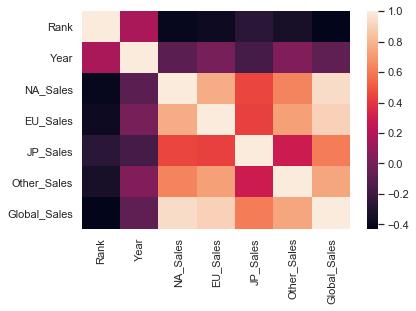

In [41]:
import seaborn as sns
vg1 = vg.corr()
sns.heatmap(vg1, 
            xticklabels=vg1.columns.values,
            yticklabels=vg1.columns.values
)


In [29]:
#version for juptyer notebook thru anaconda
vg = pd.read_csv('C:\\Users\\chris\\2020\\vgsales.csv')


In [30]:
# Video Games Sales from: https://www.kaggle.com/gregorut/videogamesales/data
print(vg.info())
print(vg.shape)
print(vg.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None
(16598, 11)
Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


In [31]:
#Going to clean data and convert year so there are no decimal points

#get shape of vg dataframe
vg.shape

#get the number of null values in column Year
vg.Year.isnull().sum()

#Can do this instead of dropping na values, can just keep finite values
#vg = vg[np.isfinite(vg['Year'])]

#drop null values from whole dataframe
vg = vg.dropna()

#convert year column to int so it eliminates the decimal points: was 2005.0 but now is 2005
vg['Year'] = vg["Year"].astype(int)
#confirm the change in datatype
vg.dtypes
#see new dataframe
vg.head()

(16598, 11)

271

Rank              int64
Name             object
Platform         object
Year              int32
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [32]:
#Display games with more than 8 million units in global sales
vg1 = vg[vg.Global_Sales > 5]

#Create new column to check the summmation of the Sales by segment actually equates to Global Sales
vg1['Sales_Check'] = vg1.iloc[:,-5:-1].sum(axis=1)
vg1
#It does so were moving on

C:\Users\chris\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_Check
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,35.83
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,31.38
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,29.01
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,28.61
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,28.31


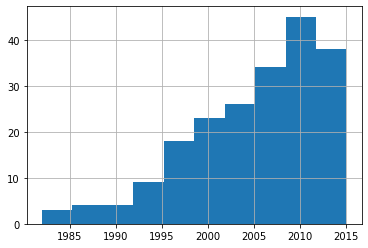

In [39]:
#Create a chart to what the yearly frequency of sales above 5M
#vg1['Year'].value_counts().hist
vg1['Year'].hist()

<Figure size 1080x720 with 0 Axes>

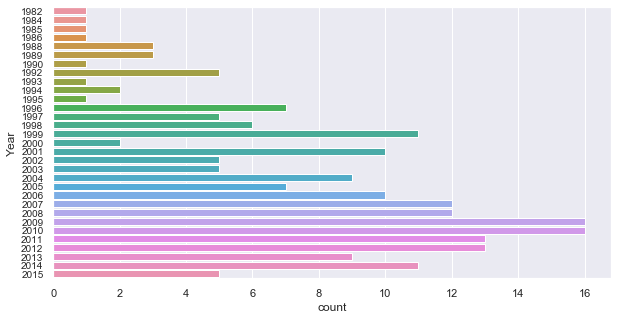

<Figure size 1080x720 with 0 Axes>

In [71]:
# Chart of yearly Count of Games with Unit Sales > 5M
a = sns.countplot(y="Year", data=vg1)
#plt.rcParams["figure.figsize"] = (10, 5)
#plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10
plt.figure(figsize=(15,10))

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Yearly Count of Games with Sales > $5M')

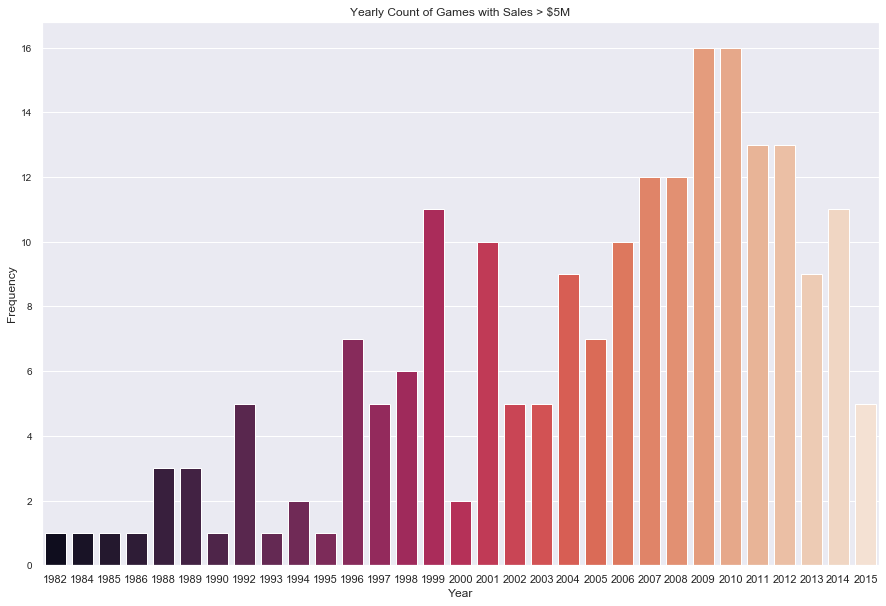

In [79]:
# Better chart for displaying yearly Count of Games with Unit Sales > 5M (years 1985 - 2016)

Year_count = Counter(vg1.Year)
most_year=Year_count.most_common(40)
Year,count = zip(*most_year)
Year,count = list(Year),list(count)

# visualization

plt.figure(figsize=(15,10))
ax=sns.barplot( x = Year, y = count, palette = 'rocket')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Yearly Count of Games with Unit Sales > 5M')
plt.show()

<Figure size 720x360 with 0 Axes>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Yearly Count of Games with Sales > $5M')

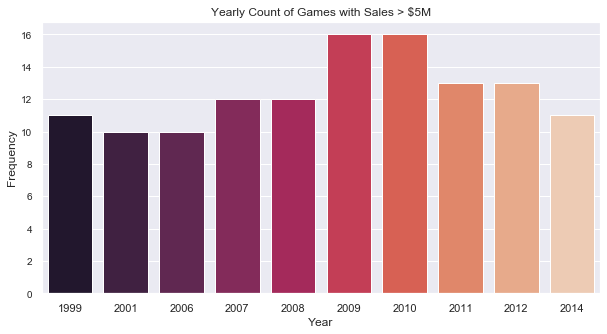

In [81]:
# Top 10 years with global games sales $5M (years 1985 - 2015)
Year_count = Counter(vg1.Year)
most_year=Year_count.most_common(10)
Year,count = zip(*most_year)
Year,count = list(Year),list(count)

# visualization

plt.figure(figsize=(10,5))
ax=sns.barplot( x = Year, y = count, palette = 'rocket')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Yearly Count of Games with Unit Sales > 5M')
plt.show()

In [ ]:
#the dataset contains data from 1985 - 2016 (the data from 2016 is impartial which shows why no games
#are featured with over $5B in sales)
###########################

In [85]:
#Create new df that features just xbox360, ps3 and wii 
#Xbox 360 release date = Late Nov 2005 / PS3 release date = Late Nov 2006 / wii release date = Mid Nov 2006
#Xbox one release date = Mid Nov 2013 / PS4 release date = Mid Nov 2013

vg = pd.read_csv('C:\\Users\\chris\\2020\\vgsales.csv')
#Going to clean data and convert year so there are no decimal points

#get shape of vg dataframe
vg.shape

#get the number of null values in column Year
vg.Year.isnull().sum()

#Can do this instead of dropping na values, can just keep finite values
#vg = vg[np.isfinite(vg['Year'])]

#drop null values from whole dataframe
vg = vg.dropna()

#convert year column to int so it eliminates the decimal points: was 2005.0 but now is 2005
vg['Year'] = vg["Year"].astype(int)
#confirm the change in datatype
vg.dtypes
#see new dataframe
vg.head()

vg.Platform.unique()

(16598, 11)

271

Rank              int64
Name             object
Platform         object
Year              int32
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [90]:
vg_vs = vg[(vg.Platform == "Wii") |(vg.Platform == "PS3") | (vg.Platform == "X360")]
vg_vs.head()
vg_vs.shape

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


(3828, 11)

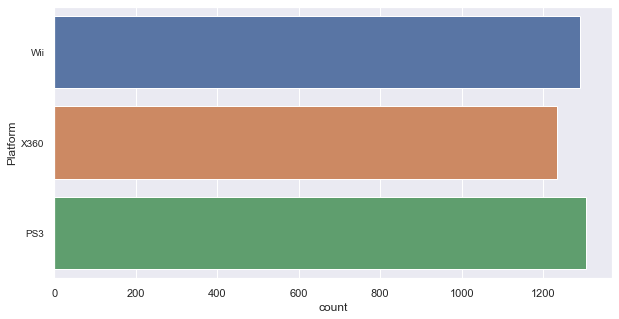

In [94]:
# Frequency count of games by platform
a = sns.countplot(y="Platform", data=vg_vs)



<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

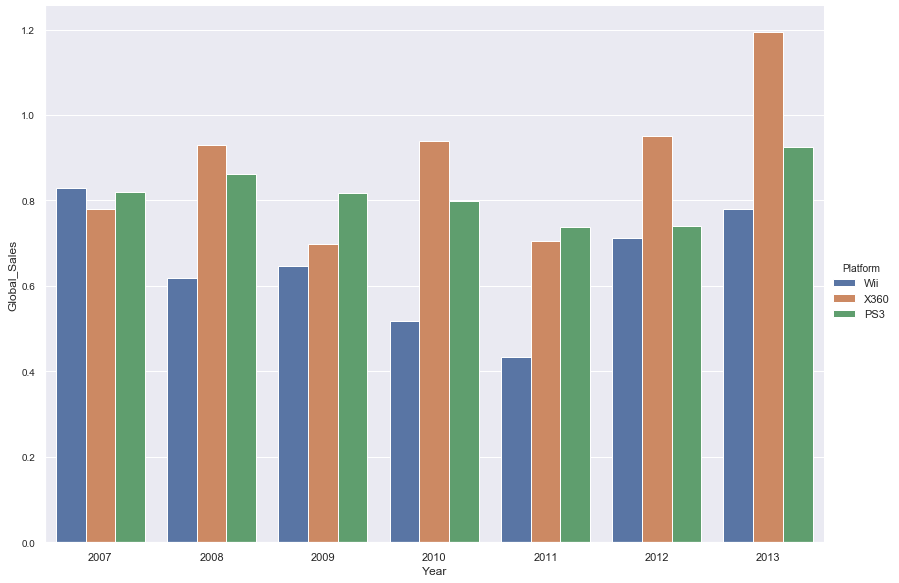

In [106]:
#XBOX 360 vs PS3 vs Wii
#this is very subjective bc the platforms were released at different times
# lots of wii sports games were sold in 2005 which highly skews the below graph
#going to do the same comparison but for publisher: sony vs microsoft vs nintendo
first_filter=vg_vs.Year>2006
second_filter=vg_vs.Year<2014
new_vg=vg_vs[first_filter&second_filter]

plt.figure(figsize=(15,10))
sns.catplot(x="Year",y="Global_Sales",kind="bar",
            hue="Platform",
            data=new_vg,
            edgecolor=None,
            height=8.27, aspect=11.7/8.27,ci=None)
plt.show()

In [110]:
#Create new df that features top 5 game publishers in terms of game sales for xbox360, xbox one, ps3, and ps4

vg = pd.read_csv('C:\\Users\\chris\\2020\\vgsales.csv')
#Going to clean data and convert year so there are no decimal points

#get shape of vg dataframe
vg.shape

#get the number of null values in column Year
vg.Year.isnull().sum()

#Can do this instead of dropping na values, can just keep finite values
#vg = vg[np.isfinite(vg['Year'])]

#drop null values from whole dataframe
vg = vg.dropna()

#convert year column to int so it eliminates the decimal points: was 2005.0 but now is 2005
vg['Year'] = vg["Year"].astype(int)
#confirm the change in datatype
vg.dtypes
#see new dataframe
vg.head()

vg.Platform.unique()
vg.Publisher.unique()

(16598, 11)

271

Rank              int64
Name             object
Platform         object
Year              int32
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',
     

In [125]:
#Filtering on X360/Xbox One and PS3/PS4
vg_vs1 = vg[(vg.Platform == "X360") |(vg.Platform == "XOne") | (vg.Platform == "PS3") | (vg.Platform == "PS4")]
#Filtering on global unit sales greater than 5M
vg_vs2 = vg_vs1[(vg_vs1.Global_Sales > 5)]
vg_vs2.shape
#67 Xbox360/XboxOne/PS3/PS4 games with more than 5 million global unit sales
vg_vs2

(67, 11)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15,16,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
23,24,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
29,30,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,32,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
33,34,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
34,35,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
35,36,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
36,37,Call of Duty: Modern Warfare 2,X360,2009,Shooter,Activision,8.52,3.63,0.08,1.29,13.51
37,38,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.46


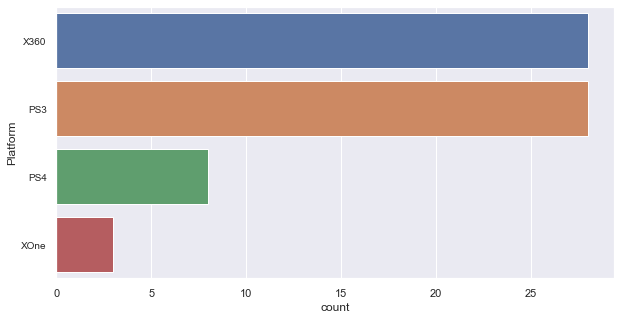

In [126]:
# Frequency count of games by platform
# Frequency count of games by platform
a = sns.countplot(y="Platform", data=vg_vs2)


In [ ]:
###i need to finish the analysis for these 4 consoles. Once I finish that, I need to filter out some thing out
##maybe I omit newer consoles bc we dont have full data

# needd to webscrape the entire new list from https://www.vgchartz.com/gamedb/ using ... https://github.com/GregorUT/vgchartzScrape
#will need to read documentation to get thru it / update packages / and update code. Can be tough but need to finish